---
layout: exercises
chapter: 3
chapter-title: Classification
permalink: /ml-book/chapter3/exercises.html
---

## Exercise 1

Build an MNIST classifier that achieves of 97% accuracy for the test set.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
# MNIST changed to https://www.openml.org/d/554
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
# Do this to follow along with Geron
def sort_by_target(mnist):visu
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
# Shuffling
shuf_order = np.random.permutation(len(y_train))
X_train, y_train = X_train[shuf_order, :], y_train[shuf_order]

(70000, 784) (70000,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()

cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.97141667, 0.96991667, 0.96791667, 0.9695    , 0.97      ])

In [6]:
# Pretty close right off the bat
# Let's try GridSearch
params = [
    dict(n_neighbors=list(range(5, 10)), weights=["uniform", "distance"])
]

gs = GridSearchCV(knn_clf, param_grid=params, cv=5, scoring="accuracy", verbose=4, n_jobs=4)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid=[{'n_neighbors': [5, 6, 7, 8, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=4)

In [12]:
cvres = gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.96975 {'n_neighbors': 5, 'weights': 'uniform'}
0.9712 {'n_neighbors': 5, 'weights': 'distance'}
0.9690333333333333 {'n_neighbors': 6, 'weights': 'uniform'}
0.9721666666666666 {'n_neighbors': 6, 'weights': 'distance'}
0.96905 {'n_neighbors': 7, 'weights': 'uniform'}
0.9702666666666667 {'n_neighbors': 7, 'weights': 'distance'}
0.9678333333333333 {'n_neighbors': 8, 'weights': 'uniform'}
0.9704666666666666 {'n_neighbors': 8, 'weights': 'distance'}
0.9673 {'n_neighbors': 9, 'weights': 'uniform'}
0.96835 {'n_neighbors': 9, 'weights': 'distance'}


In [13]:
final_model = gs.best_estimator_
final_preds = final_model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, final_preds)
# Barely better : /, but we pass the exercise

0.9709

## Exercise 2

Augment the training set by writing a function which shifts each image in the training set by one pixel in each of the four directions (up, down, left, right).

Text(0.5, 1.0, 'Left Shift')

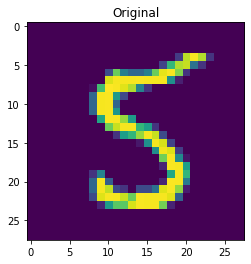

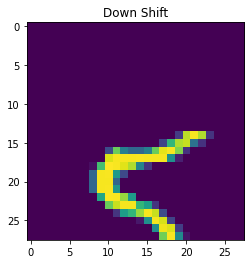

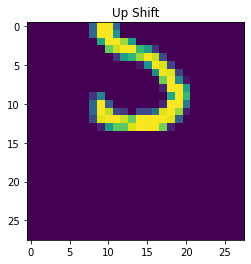

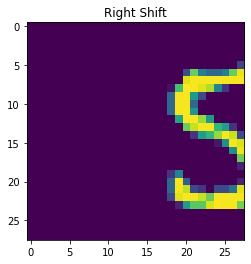

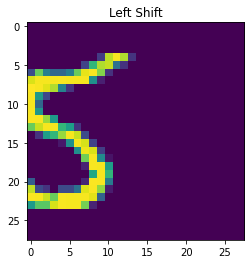

In [34]:
from scipy.ndimage import shift
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape((28, 28)))
plt.title("Original")
plt.figure()
plt.imshow(shift(X_train[0].reshape((28, 28)), [10, 0], cval=0).astype(int))
plt.title("Down Shift")
plt.figure()
plt.imshow(shift(X_train[0].reshape((28, 28)), [-10, 0], cval=0).astype(int))
plt.title("Up Shift")
plt.figure()
plt.imshow(shift(X_train[0].reshape((28, 28)), [0, 10], cval=0).astype(int))
plt.title("Right Shift")
plt.figure()
plt.imshow(shift(X_train[0].reshape((28, 28)), [0, -10], cval=0).astype(int))
plt.title("Left Shift")


In [38]:
def aug(x, y):
    new_x = []
    new_y = []
    for xi, yi in zip(x, y):
        im = xi.reshape((28, 28))
        down = shift(im, [1, 0], cval=0).astype(int)
        up = shift(im, [-1, 0], cval=0).astype(int)
        right = shift(im, [0, 1], cval=0).astype(int)
        left = shift(im, [0, -1], cval=0).astype(int)
        for v in [im, down, up, right, left]:
            new_x.append(v.flatten())
            new_y.append(yi)
    return np.array(new_x), np.array(new_y)
X_train_aug, y_train_aug = aug(X_train, y_train)

In [39]:
len(X_train), len(X_train_aug)

(60000, 300000)

In [42]:
knn_clf_aug = KNeighborsClassifier(**gs.best_params_)
knn_clf_aug.fit(X_train_aug, y_train_aug)
final_preds_aug = knn_clf_aug.predict(X_test)
accuracy_score(y_test, final_preds_aug)

0.9772

That's a ~0.63% improvement!

## Exercise 3

Do Kaggle Titanic. See [here](https://www.kaggle.com/rileypeterson/code) (In Progress...).